In [93]:
# read a csv file
library(tidyverse)
setwd("/Users/haradamayu/InorganicAnalysis_2025")
data <- read_csv("data/InorganicAnalysis_WholeClass.csv", skip = 1)
head(data)

Rows: 24 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Sample
dbl (22): Group, DAS, Fresh Weight (g), Dry Weight (g), Water Content, SPAD ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Group,Sample,DAS,Fresh Weight (g),Dry Weight (g),Water Content,SPAD Value,Fv/Fm,ΦII_GL,ΦII_HL,⋯,NO3-N (%),Share of NO3-N (%),NO3 (mg/kg FW),Total P (%),Pi (%),Share of Pi (%),K (%),NO3- (mM),Pi (mM),K+ (mM)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N150,32,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
1,N250,32,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
2,N150,25,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
2,N250,25,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
3,N150,32,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
3,N250,32,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


In [94]:
# wrangle the dataset
library(janitor)
library(dplyr)
library(tidyr)
data_wl <- data |>
    mutate(SampleLabel = str_c(Sample, "_", DAS, "d")) |>
    relocate(SampleLabel, .before = 4) |>
    mutate(DAS = str_c(DAS, "d")) |>
    relocate(DAS, .before = 3) |>
    dplyr::select(-Group) |>
    clean_names()
data_wl$sample_label <- as.factor(data_wl$sample_label)
head(data_wl)

sample,das,sample_label,fresh_weight_g,dry_weight_g,water_content,spad_value,fv_fm,phii_gl,phii_hl,⋯,no3_n_percent,share_of_no3_n_percent,no3_mg_kg_fw,total_p_percent,pi_percent,share_of_pi_percent,k_percent,no3_m_m,pi_m_m,k_m_m
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N150,32d,N150_32d,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
N250,32d,N250_32d,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
N150,25d,N150_25d,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
N250,25d,N250_25d,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
N150,32d,N150_32d,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
N250,32d,N250_32d,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


## Single Data Graph: DAS and N

In [95]:
# tukey-test
library(emmeans)
library(multcomp)
library(multcompView)
TukeyHSD(aov(fresh_weight_g ~ sample_label, data = data_wl))
res <- aov(fresh_weight_g ~ sample_label, data = data_wl) 
tuk <- glht(res, linfct = mcp(sample_label = "Tukey")) 
mltv <- cld(tuk, decreasing = F)
abc <- mltv[["mcletters"]][["Letters"]]

tukey_result <- data_wl |>
    group_by(sample_label) |>
    summarize(mean = mean(fresh_weight_g)) |>
    mutate(result = abc)
tukey_result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fresh_weight_g ~ sample_label, data = data_wl)

$sample_label
                        diff        lwr        upr     p adj
N150_32d-N150_25d  25.445000  16.979119  33.910881 0.0000003
N250_25d-N150_25d   1.263333  -7.202548   9.729215 0.9748058
N250_32d-N150_25d  28.991667  20.525785  37.457548 0.0000000
N250_25d-N150_32d -24.181667 -32.647548 -15.715785 0.0000007
N250_32d-N150_32d   3.546667  -4.919215  12.012548 0.6503997
N250_32d-N250_25d  27.728333  19.262452  36.194215 0.0000001


sample_label,mean,result
<fct>,<dbl>,<chr>
N150_25d,46.96333,a
N150_32d,72.40833,b
N250_25d,48.22667,a
N250_32d,75.95500,b


In [118]:
# colour pallet
colour_code <- c("N150_25d" = "#44B3E1", 
                 "N150_32d" = "#156082", 
                 "N250_25d" = "#F1A983", 
                 "N250_32d" = "#E97132")

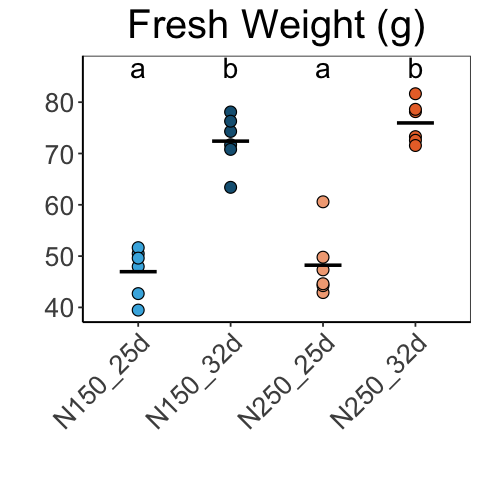

In [97]:
# draw a plot
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 4, repr.plot.height = 4)
y_max <- max(data_wl$fresh_weight_g, na.rm = TRUE)

FW_plot <- data_wl |>
    ggplot(aes(x = sample_label, y = fresh_weight_g, fill = sample_label)) +
    geom_jitter(shape = 21, colour = "black", width = 0, size = 3) +
    stat_summary(fun = mean, geom = "crossbar", width = 0.4, fatten = 2, colour = "black") +
    geom_text(data = tukey_result, aes(x = sample_label, y = y_max + 5, label = result),
            size = 6, inherit.aes = FALSE) +
    labs(x = "", y = "", title = "Fresh Weight (g)") +
    scale_fill_manual(values = colour_code) +
    theme_bw() +  
    theme(
        text = element_text(size = 20, colour = "black"),
        axis.line = element_line(colour = "black"),
        axis.text.x = element_text(angle = 45, hjust = 1),  
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "none"
    ) 
FW_plot

## Multiple Data Graph 1: DAS and N

In [98]:
# wrangle the data
data_long <- data_wl |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value") |>
    dplyr::select(sample_label:Value)
head(data_long)

sample_label,Variable,Value
<fct>,<chr>,<dbl>
N150_32d,fresh_weight_g,71.700
N150_32d,dry_weight_g,3.920
N150_32d,water_content,17.300
N150_32d,spad_value,34.200
N150_32d,fv_fm,0.774
N150_32d,phii_gl,0.426


In [99]:
cols_name <- c("fresh_weight_g", "dry_weight_g", "water_content", 
          "spad_value", "fv_fm", "phii_gl", "phii_hl", "npq_gl", "npq_hl", 
          "kjeldahl_n_percent", "no3_n_percent", "share_of_no3_n_percent", "no3_mg_kg_fw", 
          "total_p_percent", "pi_percent", "share_of_pi_percent", "k_percent", 
          "no3_m_m", "pi_m_m", "k_m_m")

cols_tbl <- tibble(cols_name) |>
    mutate(cols_name = str_c(cols_name)) 

In [100]:
# make a tibble for tukey results (ANOVA done)

library(multcomp)
library(multcompView)

abc_result <- map(cols_name, function(col) {
  res <- aov(reformulate("sample_label", response = col), data = data_wl)
  tuk <- glht(res, linfct = mcp(sample_label = "Tukey"))
  mltv <- cld(tuk, decreasing = FALSE)
  letters <- mltv[["mcletters"]][["Letters"]]
  return(letters)
})

abc_result <- tibble::as_tibble(abc_result, .name_repair = "minimal")
colnames(abc_result) <- cols_tbl$cols_name
abc_result

tukey_result2 <- data_wl |>
    group_by(sample_label) |>
    summarize(across(fresh_weight_g:k_m_m, mean, na.rm = TRUE)) |>
    mutate(abc_result) |>
    dplyr::select(sample_label, fresh_weight_g:k_m_m) |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "result")
head(tukey_result2)

fresh_weight_g,dry_weight_g,water_content,spad_value,fv_fm,phii_gl,phii_hl,npq_gl,npq_hl,kjeldahl_n_percent,no3_n_percent,share_of_no3_n_percent,no3_mg_kg_fw,total_p_percent,pi_percent,share_of_pi_percent,k_percent,no3_m_m,pi_m_m,k_m_m
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,a,ab,a,a,a,a,a,a,a,a,ab,ab,a,a,a,a,ab,a,a
b,b,b,a,a,a,a,a,a,b,b,c,c,a,a,a,b,c,a,a
a,a,a,a,a,a,a,a,a,c,c,a,a,a,a,a,a,a,a,a
b,b,b,a,a,a,a,a,a,d,ab,bc,bc,a,a,a,b,bc,a,a


sample_label,Variable,result
<fct>,<chr>,<chr>
N150_25d,fresh_weight_g,a
N150_25d,dry_weight_g,a
N150_25d,water_content,ab
N150_25d,spad_value,a
N150_25d,fv_fm,a
N150_25d,phii_gl,a


In [101]:
data_max <- data_wl |>
    dplyr::select(fresh_weight_g:k_m_m) |>
    map_dfr(max, na.rm = TRUE)
vec_max <- as.numeric(data_max[1, ])
vec_max_rep <- as.vector(matrix(rep(vec_max, each = 4), nrow = 20, byrow = TRUE))

In [102]:
# colour pallet
colour_code <- c("N150_25d" = "#44B3E1", 
                 "N150_32d" = "#156082", 
                 "N250_25d" = "#F1A983", 
                 "N250_32d" = "#E97132")

In [ ]:
# draw a plot
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 18, repr.plot.height = 13)

variable_order <- unique(data_long$Variable)
data_long$Variable <- factor(data_long$Variable, levels = variable_order)
tukey_result2$Variable <- factor(tukey_result2$Variable, levels = variable_order)

facet_plot <- data_long |>
    ggplot(aes(x = sample_label, y = Value, fill = sample_label)) +
    geom_jitter(shape = 21, colour = "black", width = 0, size = 3) +
    stat_summary(fun = mean, geom = "crossbar", width = 0.4, fatten = 2, colour = "black") +
    geom_text(data = tukey_result2, aes(x = sample_label, y = vec_max_rep + vec_max_rep/10, label = result),
            size = 6, inherit.aes = FALSE) +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
facet_plot  

## Multiple Data Graph 2: DAS

In [103]:
data_das <- data |>
    dplyr::select(-Group, -Sample) |>
    mutate(DAS = str_c(DAS, "d")) |>
    clean_names() |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value")
head(data_das)

das,Variable,Value
<chr>,<chr>,<dbl>
32d,fresh_weight_g,71.700
32d,dry_weight_g,3.920
32d,water_content,17.300
32d,spad_value,34.200
32d,fv_fm,0.774
32d,phii_gl,0.426


In [119]:
# f-test for das
library(purrr)

f_t_das <- data_das |>
    group_split(Variable) |>
    map_dfr(function(df) {varname <- unique(df$Variable)
                        g1 <- df %>% filter(das == "32d") %>% pull(Value) %>% na.omit()
                        g2 <- df %>% filter(das == "25d") %>% pull(Value) %>% na.omit()
                        if (sd(g1) >= sd(g2)) {group1 <- g1
                                               group2 <- g2} 
                        else {group1 <- g2
                              group2 <- g1}
                        f_test <- var.test(group1, group2)
                        t_test <- t.test(group1, group2, var.equal = f_test$p.value > 0.05)
                        tibble(Variable = varname,
                               f_p_value = f_test$p.value,
                               var_equal = f_test$p.value > 0.05,
                               t_p_value = t_test$p.value,
                               t_statistic = t_test$statistic,
                               t_method = t_test$method,
                               t_p_signif = symnum(t_test$p.value, 
                                                   corr = FALSE,
                                                   cutpoints = c(0,0.001,0.01,0.05,1),
                                                   symbols = c("***", "**", "*", "ns")))})

head(f_t_das)
f_t_das_false <- f_t_das |>
    filter(var_equal == FALSE) |>
    dplyr::select(Variable)
f_t_das_false

Variable,f_p_value,var_equal,t_p_value,t_statistic,t_method,t_p_signif
<fct>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<noquote>
fresh_weight_g,0.66619605,TRUE,1.647300e-11,-12.5601138,Two Sample t-test,***
dry_weight_g,0.01315471,FALSE,4.835088e-10,13.8348588,Welch Two Sample t-test,***
water_content,0.74852398,TRUE,1.012965e-03,-3.7868207,Two Sample t-test,**
spad_value,0.12337244,TRUE,1.743947e-02,2.5706961,Two Sample t-test,*
fv_fm,0.56054181,TRUE,6.663059e-01,-0.4370908,Two Sample t-test,ns
phii_gl,0.61186507,TRUE,9.645585e-02,-1.7365236,Two Sample t-test,ns


Variable
<fct>
dry_weight_g


In [105]:
# define the position of p.signif
data_das_max <- data_das |>
    group_by(Variable) |>
    summarize(p.signif_pos = max(Value, na.rm = TRUE)*1.1) |>
    ungroup()

f_t_das2 <- f_t_das |>
  left_join(data_das_max, by = "Variable")

# define the order
variable_order_das <- unique(data_das$Variable)
data_das$Variable <- factor(data_das$Variable, levels = variable_order_das)
data_das_max$Variable <- factor(data_das_max$Variable, levels = variable_order_das)
f_t_das2$Variable <- factor(f_t_das2$Variable, levels = variable_order_das)

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


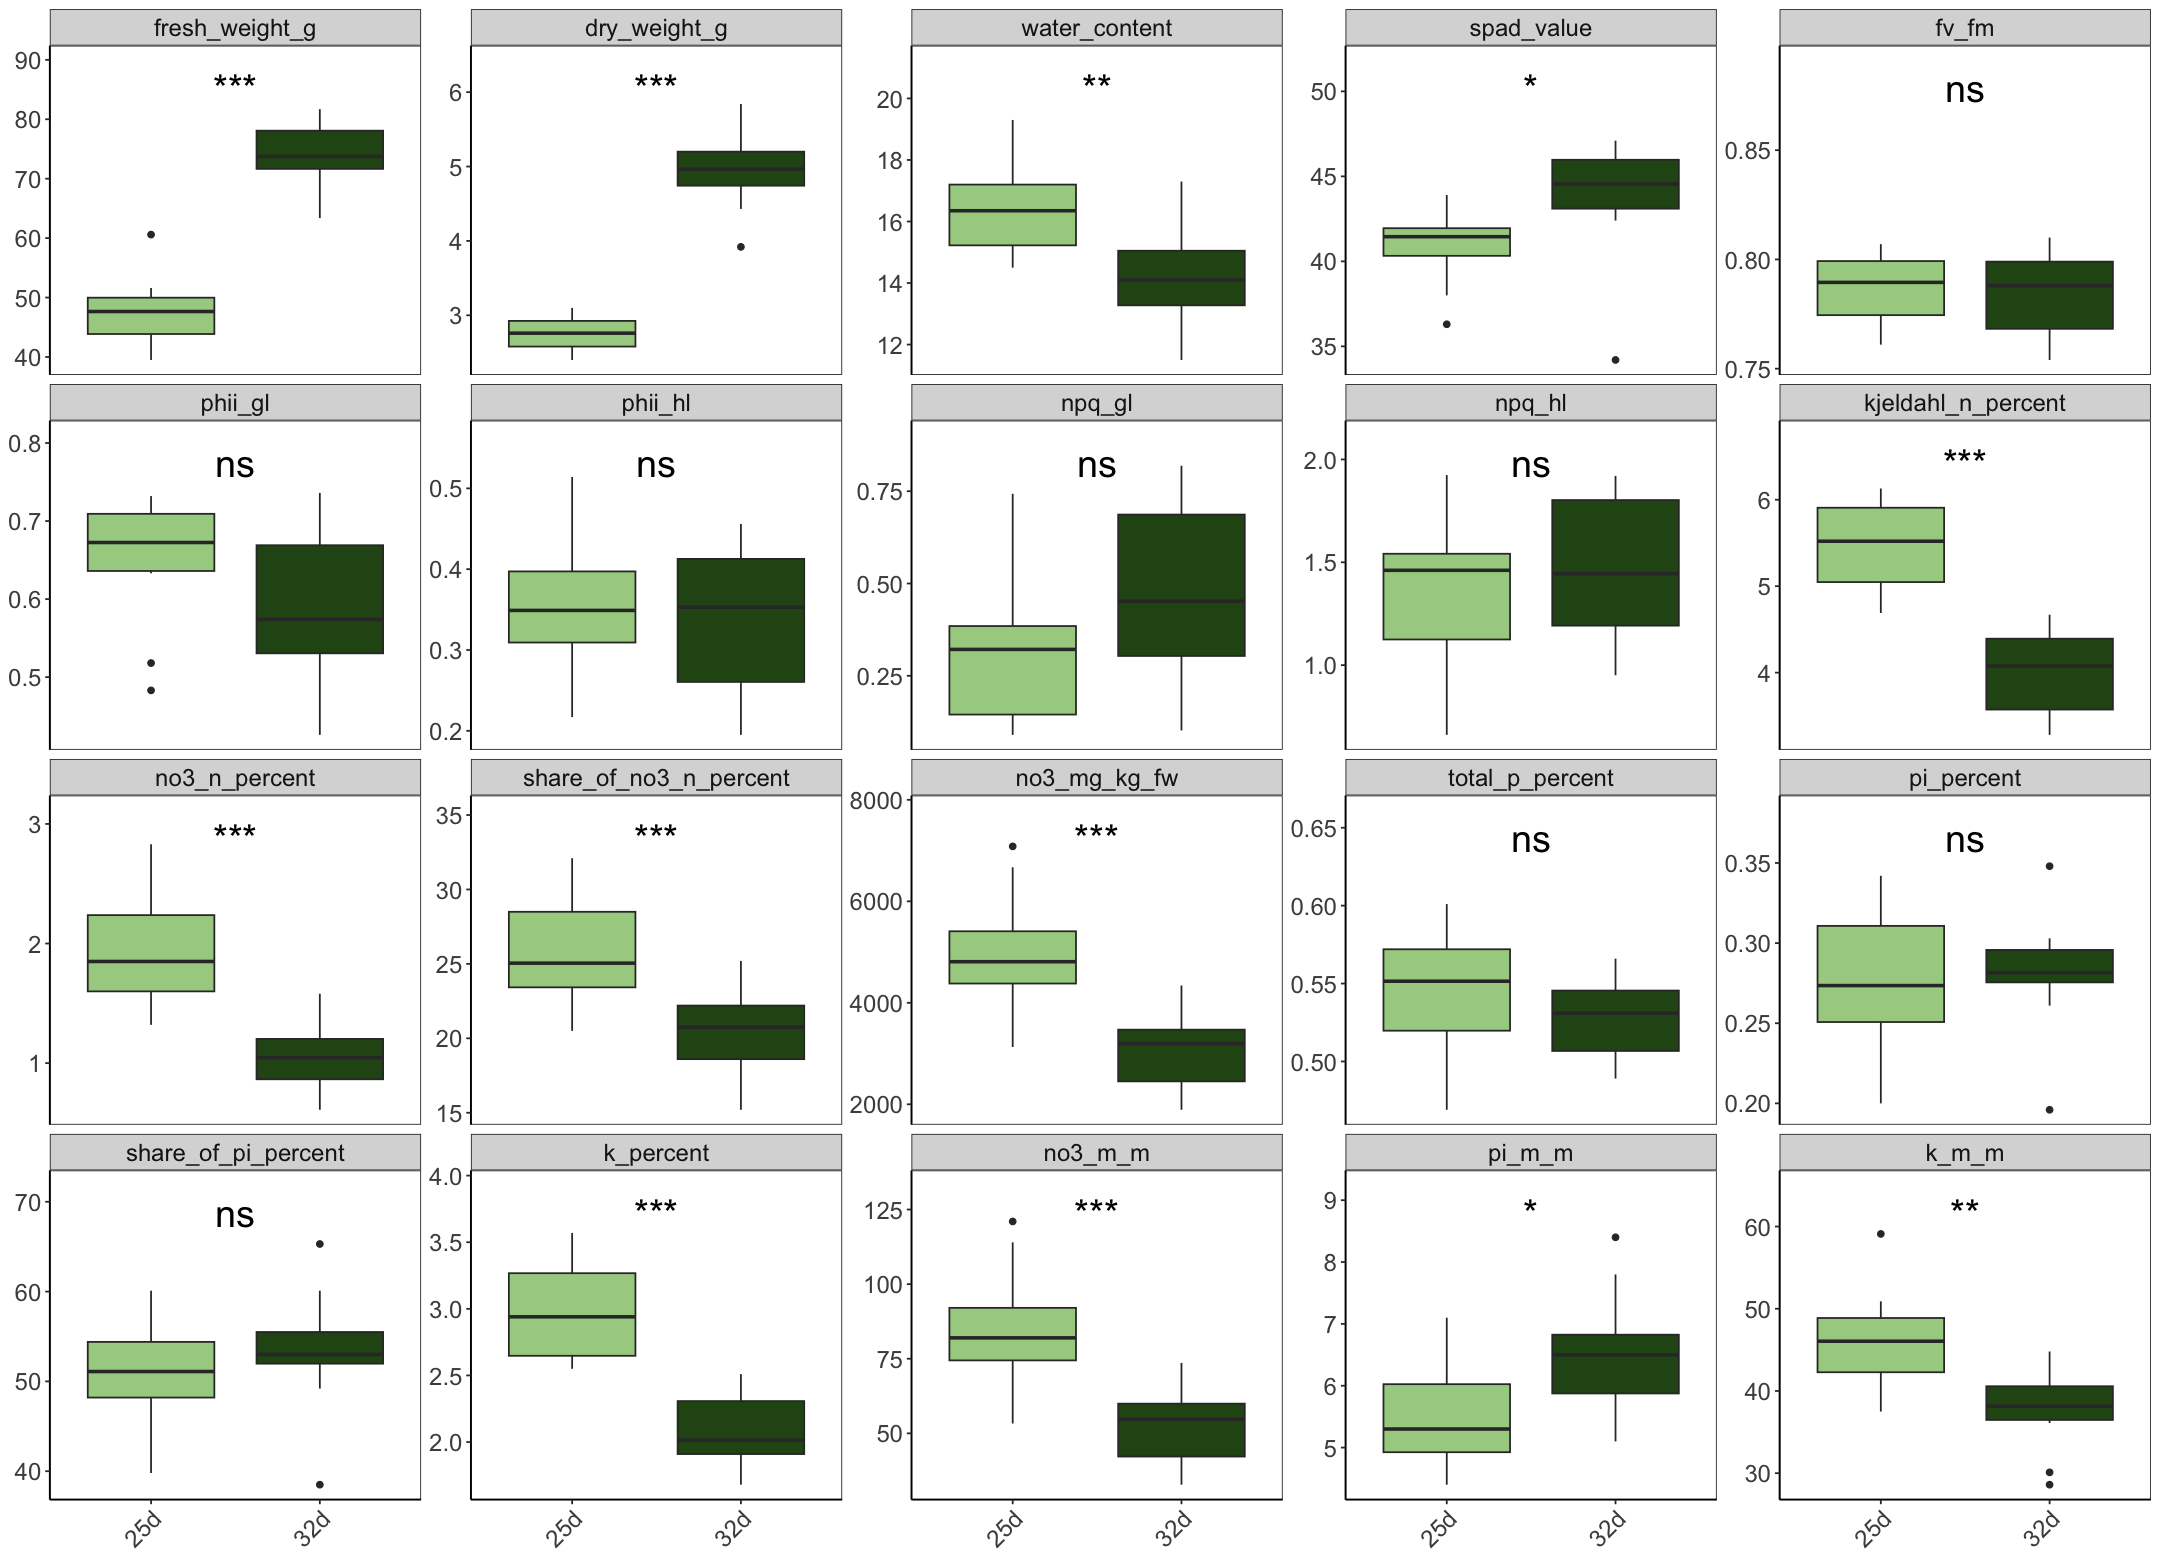

In [106]:
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 18, repr.plot.height = 13)

# colour pallet
colour_code2 <- c("25d" = "#A6D08F", "32d" = "#275317")

# draw a plot
das_plot <- data_das |>
    ggplot(aes(x = das, y = Value, fill = das)) +
    geom_boxplot() +
    geom_text(data = f_t_das2,
              aes(x = 1.5, y = p.signif_pos, label = t_p_signif),
              inherit.aes = FALSE,
              vjust = 1.5,
              size = 8) +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code2) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
das_plot

## Multiple Data Graph 3: N

In [120]:
data_n <- data |>
    dplyr::select(-Group, -DAS) |>
    clean_names() |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value")
head(data_n)

sample,Variable,Value
<chr>,<chr>,<dbl>
N150,fresh_weight_g,71.700
N150,dry_weight_g,3.920
N150,water_content,17.300
N150,spad_value,34.200
N150,fv_fm,0.774
N150,phii_gl,0.426


In [122]:
# f-test for n
f_t_n <- data_n |>
  group_split(Variable) |>
  map_dfr(function(df) {varname <- unique(df$Variable)
                        g1 <- df %>% filter(sample == "N150") %>% pull(Value) %>% na.omit()
                        g2 <- df %>% filter(sample == "N250") %>% pull(Value) %>% na.omit()
                        if (sd(g1) >= sd(g2)) {group1 <- g1
                                               group2 <- g2} 
                        else {group1 <- g2
                              group2 <- g1}
                        f_test <- var.test(group1, group2)
                        t_test <- t.test(group1, group2, var.equal = f_test$p.value > 0.05)
                        tibble(Variable = varname,
                               f_p_value = f_test$p.value,
                               var_equal = f_test$p.value > 0.05,
                               t_p_value = t_test$p.value,
                               t_statistic = t_test$statistic,
                               t_method = t_test$method,
                               t_p_signif = symnum(t_test$p.value, 
                                                   corr = FALSE,
                                                   cutpoints = c(0,0.001,0.01,0.05,1),
                                                   symbols = c("***", "**", "*", "ns")))})

head(f_t_n)
f_t_n_false <- f_t_n |>
    filter(var_equal == FALSE) |>
    dplyr::select(Variable)
f_t_n_false

Variable,f_p_value,var_equal,t_p_value,t_statistic,t_method,t_p_signif
<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<noquote>
dry_weight_g,0.5200753,TRUE,0.74986041,0.3228458,Two Sample t-test,ns
fresh_weight_g,0.7802095,TRUE,0.69380251,0.3989136,Two Sample t-test,ns
fv_fm,0.4972855,TRUE,0.34528841,-0.9644796,Two Sample t-test,ns
k_m_m,0.7651991,TRUE,0.69743657,-0.3944320,Two Sample t-test,ns
k_percent,0.5576978,TRUE,0.60384438,0.5272144,Two Sample t-test,ns
kjeldahl_n_percent,0.8363446,TRUE,0.03383033,2.2632426,Two Sample t-test,*


Variable
<chr>


In [123]:
# define the position of p.signif
data_n_max <- data_n |>
    group_by(Variable) |>
    summarize(p.signif_pos = max(Value, na.rm = TRUE)*1.1) |>
    ungroup()

f_t_n2 <- f_t_n |>
  left_join(data_n_max, by = "Variable")

# define the order
variable_order_n <- unique(data_n$Variable)
data_n$Variable <- factor(data_n$Variable, levels = variable_order_n)
data_n_max$Variable <- factor(data_n_max$Variable, levels = variable_order_n)
f_t_n2$Variable <- factor(f_t_n2$Variable, levels = variable_order_n)

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


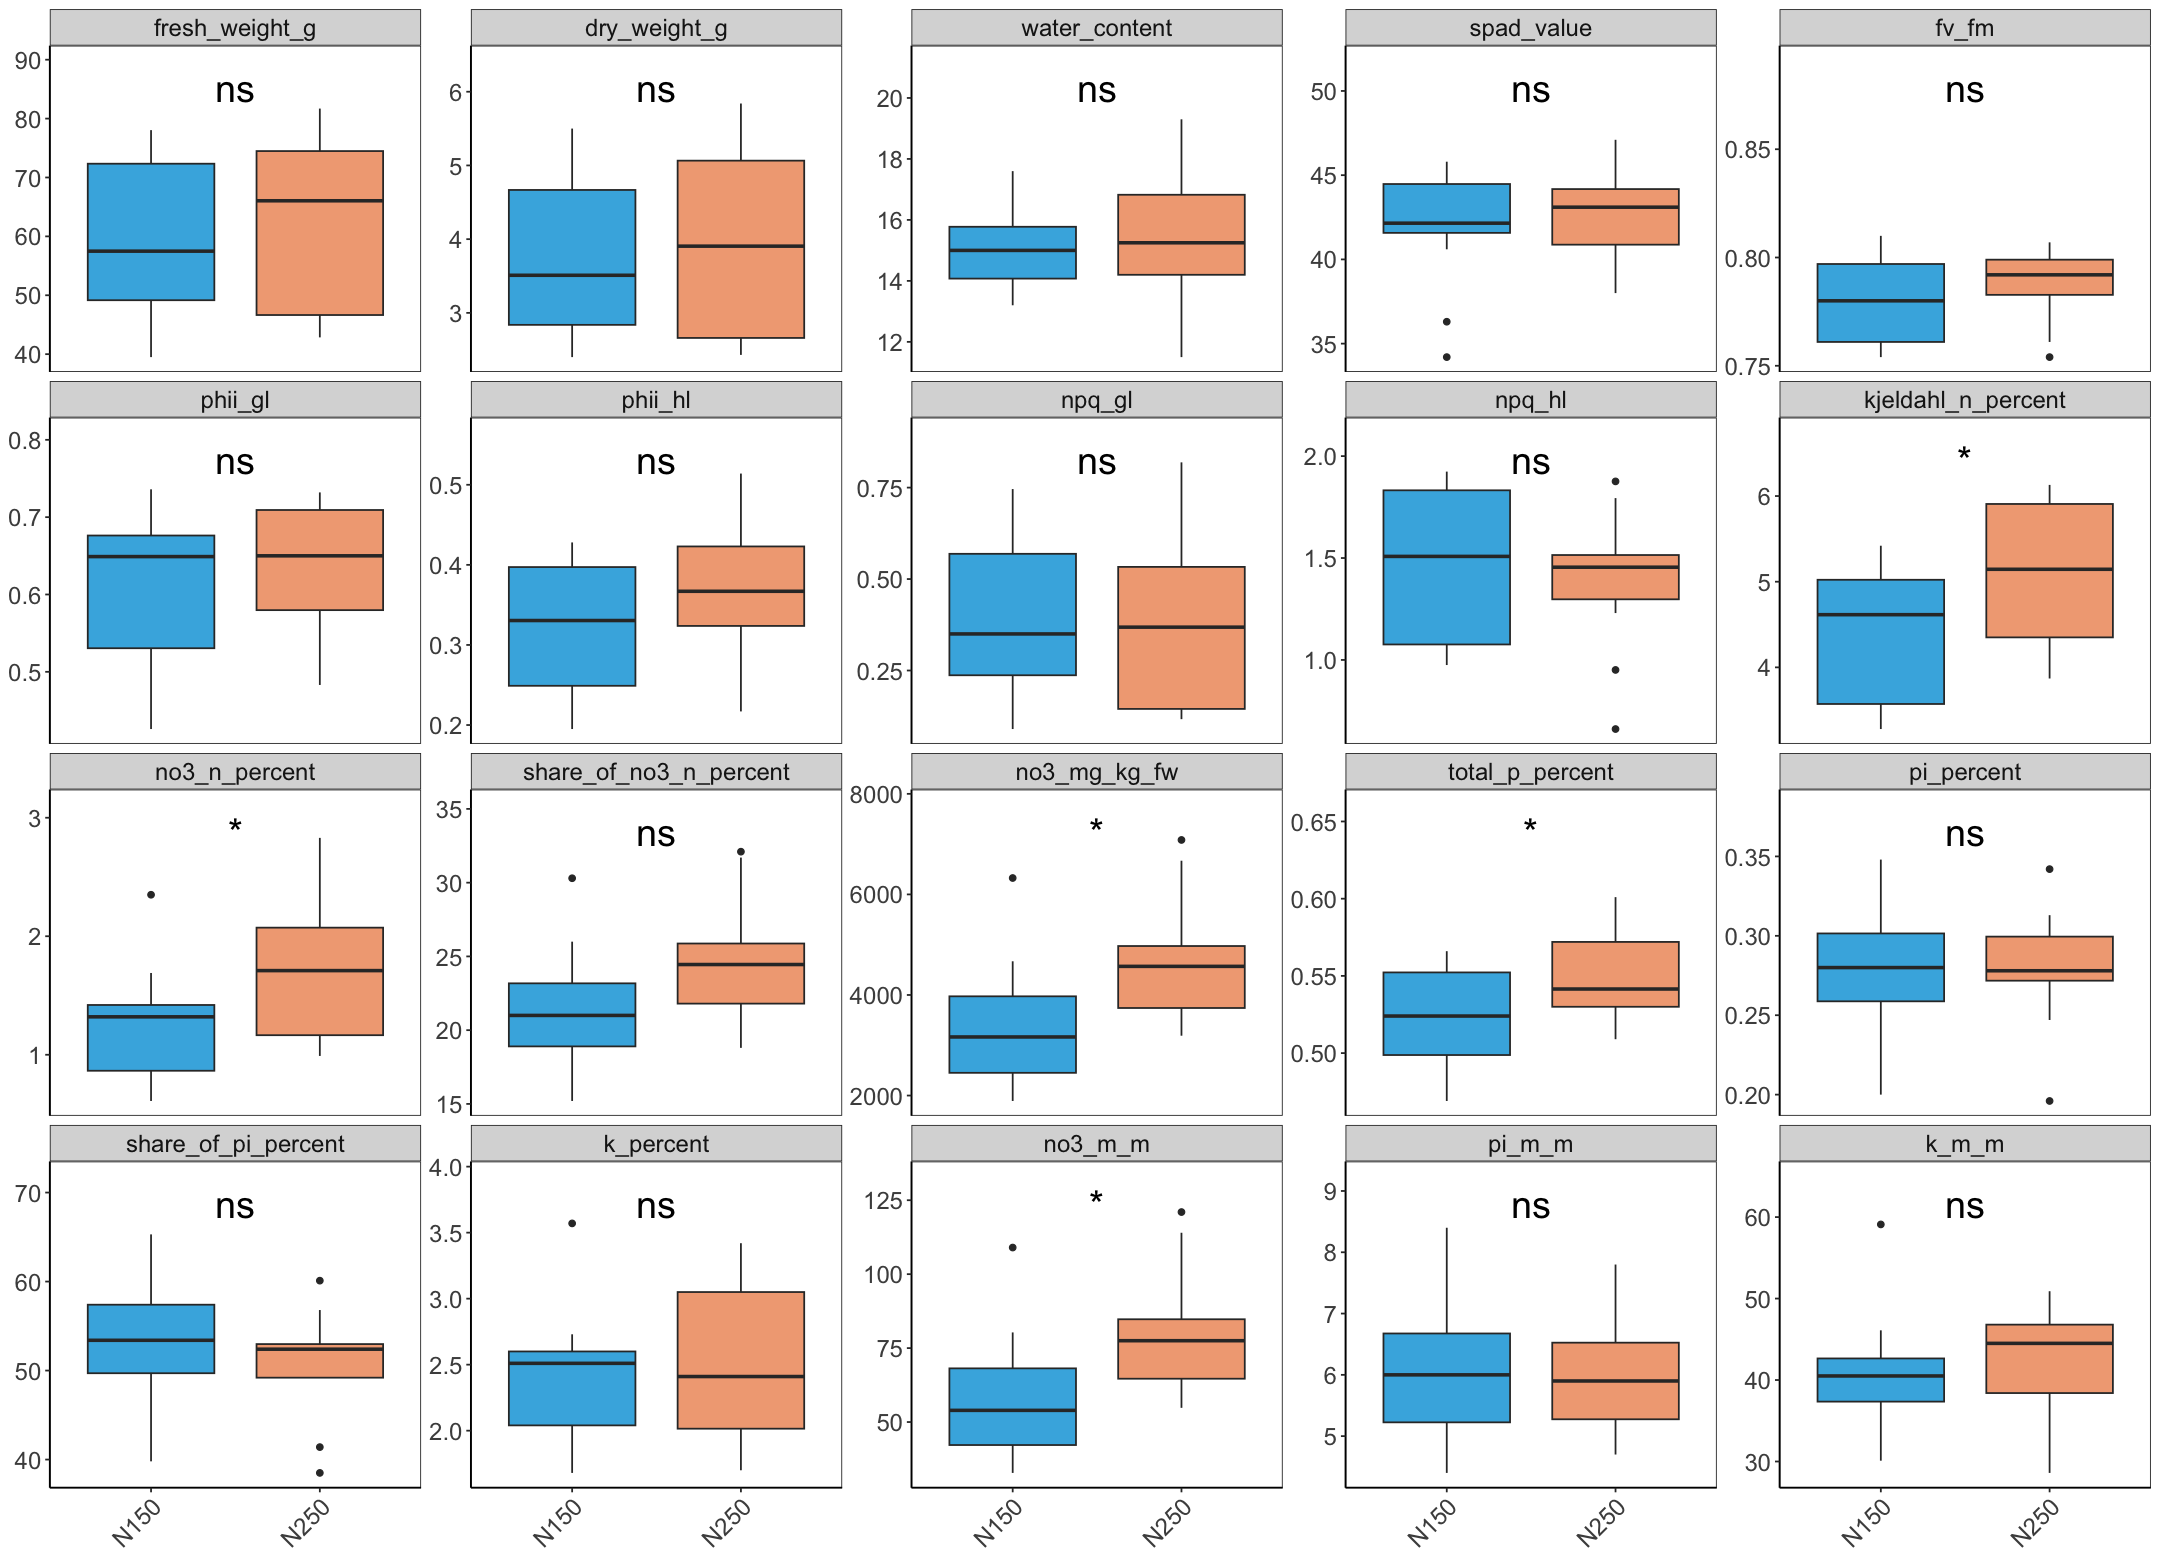

In [124]:
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 18, repr.plot.height = 13)

# colour pallet
colour_code3 <- c("N150" = "#44B3E1",
                 "N250" = "#F1A983")

# draw a plot
n_plot <- data_n |>
    ggplot(aes(x = sample, y = Value, fill = sample)) +
    geom_boxplot() +
    geom_text(data = f_t_n2,
              aes(x = 1.5, y = p.signif_pos, label = t_p_signif),
              inherit.aes = FALSE,
              vjust = 1.5,
              size = 8)+
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code3) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
n_plot

## growth light vs high light

In [109]:
# wrangling
data_light <- data |>
    clean_names() |>
    dplyr::select(sample, das, phii_gl:npq_hl) |>
    pivot_longer(cols = phii_gl:npq_hl, names_to = "factor", values_to = "value")
head(data_light)

data_phii <- data_light |>
    filter(factor %in% c("phii_gl", "phii_hl"))
y_max_phii <- max(data_phii$value, na.rm = TRUE)

data_npq <- data_light |>
    filter(factor %in% c("npq_gl", "npq_hl"))
y_max_npq <- max(data_npq$value, na.rm = TRUE)

sample,das,factor,value
<chr>,<dbl>,<chr>,<dbl>
N150,32,phii_gl,0.426
N150,32,phii_hl,0.195
N150,32,npq_gl,0.367
N150,32,npq_hl,1.410
N250,32,phii_gl,0.549
N250,32,phii_hl,0.308


In [110]:
#f-test for phii
phii_data <- data_light |>
  filter(factor %in% c("phii_gl", "phii_hl"))

g1 <- phii_data |> filter(factor == "phii_gl") |> pull(value) |> na.omit()
g2 <- phii_data |> filter(factor == "phii_hl") |> pull(value) |> na.omit()

if (sd(g1) >= sd(g2)) {
    group1 <- g1
    group2 <- g2
} else{
    group1 <- g2
    group2 <- g1
}

f_test_phii <- var.test(group1, group2)
t_test_phii <- t.test(group1, group2, var.equal = f_test_phii$p.value > 0.05) 


label_phii <- tibble(factor = NA,  
                   label.pos = max(c(g1, g2)) * 1.1,  
                   label = symnum(t_test_phii$p.value,
                                  cutpoints = c(0, 0.001, 0.01, 0.05, 1),
                                  symbols = c("***", "**", "*", "ns")))
label_phii

factor,label.pos,label
<lgl>,<dbl>,<noquote>
NA,0.8096,***


Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.


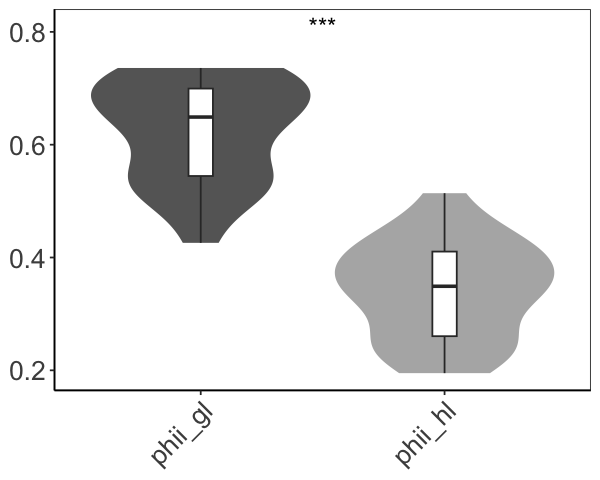

In [111]:
# draw plots for phii
colour_code_phii <- c("phii_gl" = "gray40",
                      "phii_hl" = "gray70")

options(repr.plot.width = 5, repr.plot.height = 4)
phii_plot <- data_phii |>
    ggplot(aes(x = factor, y = value, fill = factor)) +
    geom_violin(colour = "transparent") +
    geom_boxplot(width = 0.1, fill = "white") +
    geom_text(data = label_phii, 
              aes(x = 1.5, y = label.pos, label = label), 
              inherit.aes = FALSE, size = 5) +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code_phii) +
    theme_bw() +
    theme(
        text = element_text(size = 20, colour = "black"),
        axis.line = element_line(colour = "black"),
        axis.text.x = element_text(angle = 45, hjust = 1), 
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "none"
    )
phii_plot

In [112]:
#f-test for npq
npq_data <- data_light |>
  filter(factor %in% c("npq_gl", "npq_hl"))

g1 <- npq_data |> filter(factor == "npq_gl") |> pull(value) |> na.omit()
g2 <- npq_data |> filter(factor == "npq_hl") |> pull(value) |> na.omit()

if (sd(g1) >= sd(g2)) {
    group1 <- g1
    group2 <- g2
} else{
    group1 <- g2
    group2 <- g1
}

f_test_npq <- var.test(group1, group2)
t_test_npq <- t.test(group1, group2, var.equal = f_test_npq$p.value > 0.05) 


label_npq <- tibble(factor = NA,  
                   label.pos = max(c(g1, g2)) * 1.1,  
                   label = symnum(t_test_npq$p.value,
                                  cutpoints = c(0, 0.001, 0.01, 0.05, 1),
                                  symbols = c("***", "**", "*", "ns")))
label_npq

factor,label.pos,label
<lgl>,<dbl>,<noquote>
NA,2.1164,***


Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.


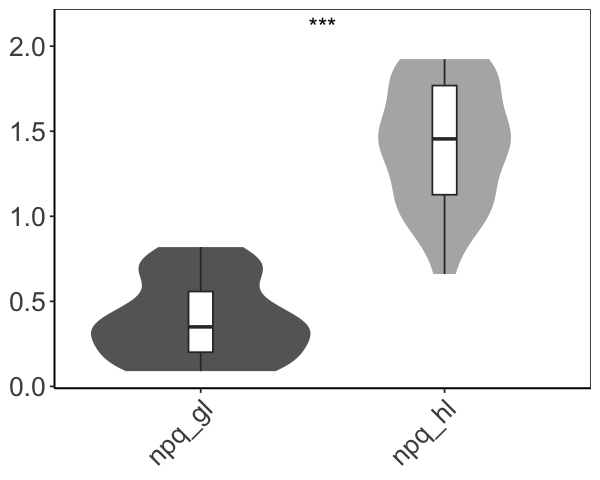

In [113]:
# draw plots for npq
colour_code_npq <- c("npq_gl" = "gray40",
                      "npq_hl" = "gray70")

options(repr.plot.width = 5, repr.plot.height = 4)
npq_plot <- data_npq |>
    ggplot(aes(x = factor, y = value, fill = factor)) +
    geom_violin(colour = "transparent") +
    geom_boxplot(width = 0.1, fill = "white") +
    geom_text(data = label_npq, 
              aes(x = 1.5, y = label.pos, label = label), 
              inherit.aes = FALSE, size = 5) +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code_npq) +
    theme_bw() +
    theme(
        text = element_text(size = 20, colour = "black"),
        axis.line = element_line(colour = "black"),
        axis.text.x = element_text(angle = 45, hjust = 1), 
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "none"
    )
npq_plot

## Heat Map and Comparison

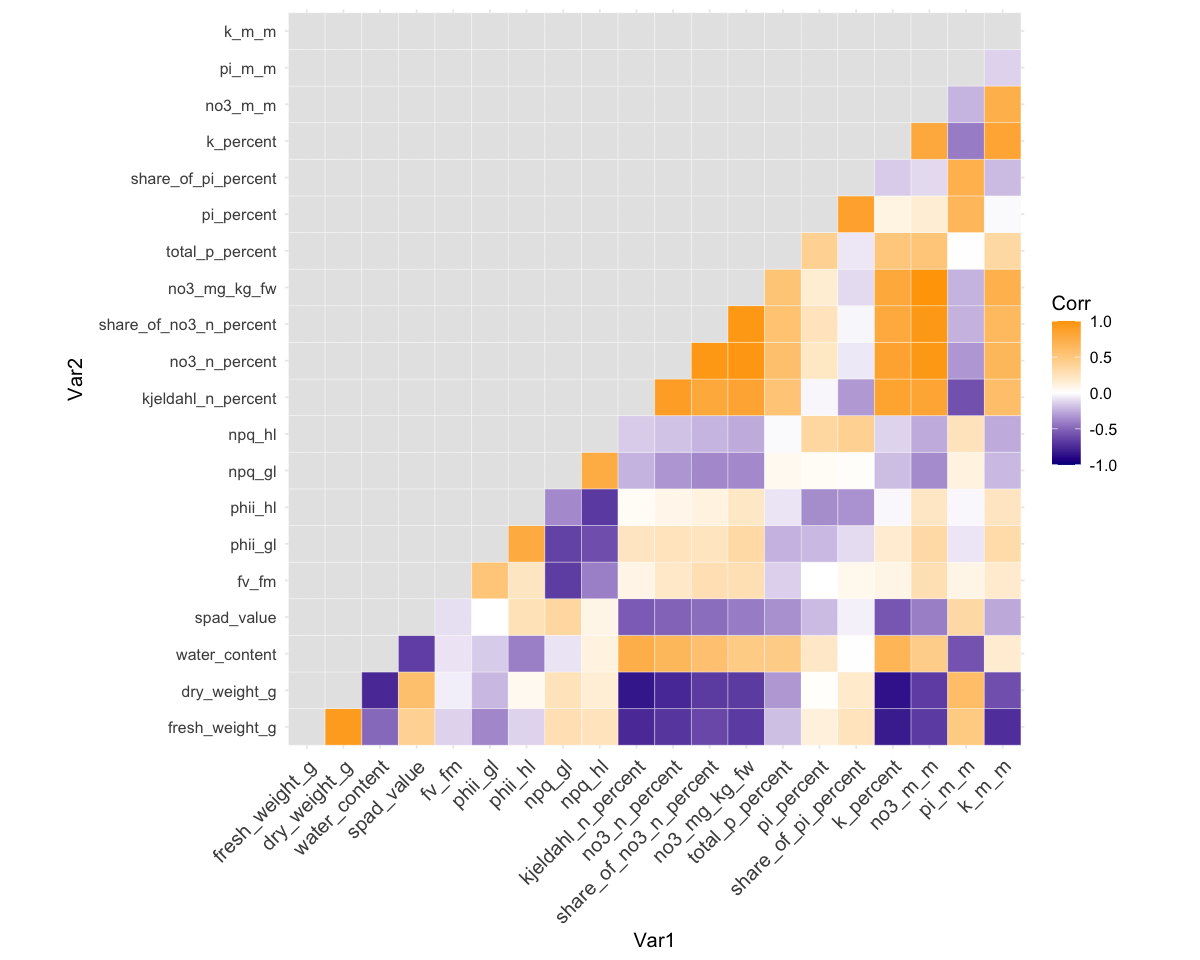

In [126]:
library(reshape2)

options(repr.plot.width = 10, repr.plot.height = 8)

cor_matrix <- data_wl |>
    dplyr::select(-sample_label, -das, -sample) |>
    cor(use = "complete.obs")  
cor_matrix[upper.tri(cor_matrix)] <- NA
diag(cor_matrix)　<- NA
cor_matrix <- melt(cor_matrix)

cor_plot <- cor_matrix |>
    ggplot(aes(Var1, Var2, fill = value)) +
    geom_tile(colour = "white") +
    scale_fill_gradient2(low = "darkblue", high = "orange", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name = "Corr", na.value = "grey90") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),
          text = element_text(size = 12)) +
    coord_fixed()

cor_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


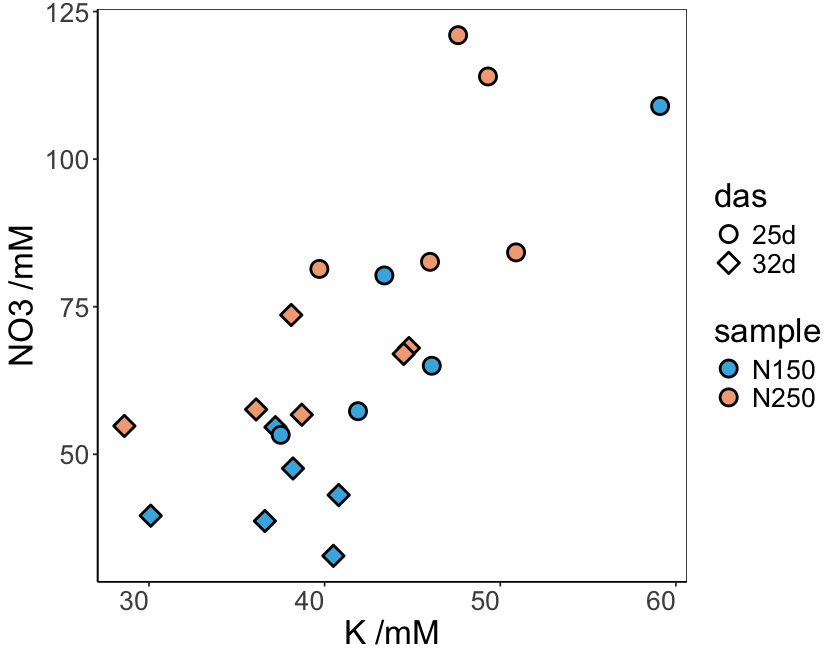

In [127]:
options(repr.plot.width = 7, repr.plot.height = 5.5)

comp1_plot <- data_wl |>
    ggplot(aes(x = k_m_m, y = no3_m_m, fill = sample, shape = das)) +
    geom_point(size = 4, colour = "black", stroke = 1.2) +
    labs(x = "K /mM", y = "NO3 /mM", legend = "Sample") +
    scale_fill_manual(values = colour_code3) +
    scale_shape_manual(values = c(21, 23)) + 
    guides(fill = guide_legend(override.aes = list(shape = 21)), 
           shape = guide_legend(override.aes = list(fill = "white"))) +
    theme_bw() +
    theme(
        text = element_text(size = 20, colour = "black"),
        axis.line = element_line(colour = "black"),
        axis.text.x = element_text(hjust = 1), 
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "right"
    )

comp1_plot

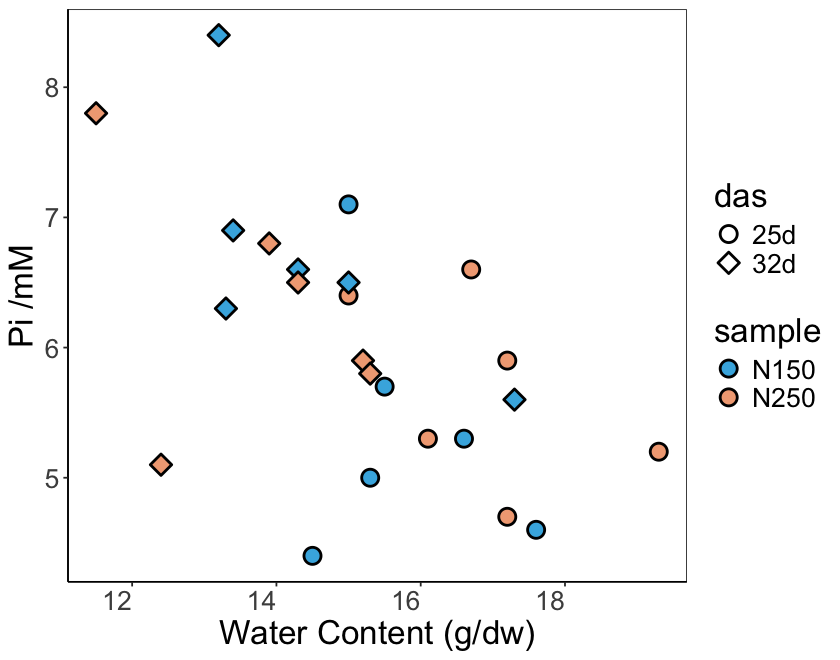

In [128]:
options(repr.plot.width = 7, repr.plot.height = 5.5)

comp2_plot <- data_wl |>
    ggplot(aes(x = water_content, y = pi_m_m, fill = sample, shape = das)) +
    geom_point(size = 4, colour = "black", stroke = 1.2) +
    labs(x = "Water Content (g/dw)", y = "Pi /mM", legend = "Sample") +
    scale_fill_manual(values = colour_code3) +
    scale_shape_manual(values = c(21, 23)) + 
    guides(fill = guide_legend(override.aes = list(shape = 21)), 
           shape = guide_legend(override.aes = list(fill = "white"))) +
    theme_bw() +
    theme(
        text = element_text(size = 20, colour = "black"),
        axis.line = element_line(colour = "black"),
        axis.text.x = element_text(hjust = 1), 
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "right"
    )

comp2_plot

## Save files

In [129]:
# save plots
ggsave("output/plot/das_plot.png", plot = das_plot, width = 18, height = 13, dpi = 300)
ggsave("output/plot/n_plot.png", plot = n_plot, width = 18, height = 13, dpi = 300)
ggsave("output/plot/all_plot.png", plot = facet_plot, width = 18, height = 13, dpi = 300)
ggsave("output/plot/phii_plot.png", plot = phii_plot, width = 5, height = 4, dpi = 300)
ggsave("output/plot/npq_plot.png", plot = npq_plot, width = 5, height = 4, dpi = 300)
ggsave("output/plot/cor_plot.png", plot = cor_plot, width = 10, height = 8, dpi = 300)
ggsave("output/plot/comp1_plot.png", plot = comp1_plot, width = 7, height = 5.5, dpi = 300)

# save test results
write.csv(f_t_das, "output/test_result/f_t_das.csv", row.names = FALSE)
write.csv(f_t_n, "output/test_result/f_t_n.csv", row.names = FALSE)
pval_result_all <- data_long |>
    compare_means(formula = Value ~ sample_label,
                 group.by = "Variable",
                 method = "t.test",
                 var.equal = FALSE,
                 paired = FALSE)
write.csv(pval_result_all, "output/test_result/t_test_results_all.csv", row.names = FALSE)

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
